In [1]:

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is version 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.2
3.3


In [3]:
from ema_workbench import (
    Policy,
    ema_logging,
    MultiprocessingEvaluator,
)
from problem_formulation import get_model_for_problem_formulation



In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.1_Dike Investment Costs'), function=<function sum_over at 0x000002062A068C20>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x000002062A068C20>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage', 'A.2_Dike Investment Costs'), function=<function sum_over at 0x000002062A068C20>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x000002062A068C20>)
ScalarOutcome('A.3 Total Costs', variable_name=('A.3_Expected Annual Damage', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x000002062A068C20>)
ScalarOutcome('A.3_Expected Number of Deaths', variable_name=('A.3_Expected Number of Deaths',), function=<function sum_over at 0x000002062A068C20>)
ScalarOutcome('A.4 Total Costs', variable_name=('A.4_Expected Annual Dama

In [8]:
# running the model through EMA workbench #50-4
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1, policies=1)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 1 scenarios * 1 policies * 1 model(s) = 1 experiments
100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,69,260.591537,1.0,0.249946,262.930088,1.0,0.29386,198.044219,1.0,0.978438,...,5,6,3,4,6,2,1,1,0,dikesnet


In [10]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,3.940352e+08,0.0,1.815562e+08,0.0,1.157440e+08,0.0,3.819115e+07,0.0,1.180355e+08,0.0,916200000.0,0.0


In [11]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [12]:
# pass the policies list to EMA workbench experiment runs #`1`
n_scenarios = 1
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 1 scenarios * 3 policies * 1 model(s) = 3 experiments
100%|████████████████████████████████████████████| 3/3 [00:00<00:00,  3.90it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [13]:
experiments, outcomes = results

In [14]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,5.397251e+07,0.000000,9.711464e+06,0.011047,0.000000e+00,0.0,6.723968e+07,0.036815,0.000000e+00,0.0,253800000.0,0.0
1,2.300303e+06,0.001942,9.711464e+06,0.011047,0.000000e+00,0.0,2.644983e+07,0.013871,3.667668e+07,0.0,768300000.0,0.0
2,0.000000e+00,0.000000,2.279476e+06,0.002570,2.879840e+07,0.0,6.092956e+07,0.032531,0.000000e+00,0.0,369700000.0,0.0


In [15]:
from ema_workbench.analysis import prim

df = pd.DataFrame(outcomes)
df_exp = pd.DataFrame(experiments)
x = df_exp
y= df['A.2 Total Costs']
y= y < 26042749

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha= 0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

AssertionError: 

(this is a bad draft, just getting my thoughts on paper)
Once we have run the model, we can do scenario discovery using PRIM. This will select a limited number of experiments out of the 1000 runs we made to further analyse, based on criteria we choose. (do we clean first? unsure, running PRIM without first to check)

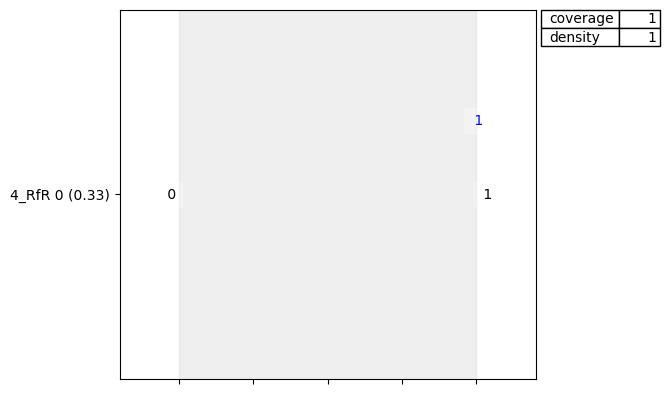

In [ ]:
box1.inspect(style='graph')
plt.show()

In [ ]:
from ema_workbench.analysis import dimensional_stacking


In [ ]:
#dimensional_stacking.create_pivot_plot(x, y)

In [2]:
from ema_workbench import (
    Policy,
    ema_logging,
    MultiprocessingEvaluator,
)
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [3]:
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:39<00:00,  7.55it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [4]:
experiments, outcomes = results

c:\Users\jhsti\anaconda3\Lib\site-packages\ema_workbench\analysis\parcoords.py:220: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


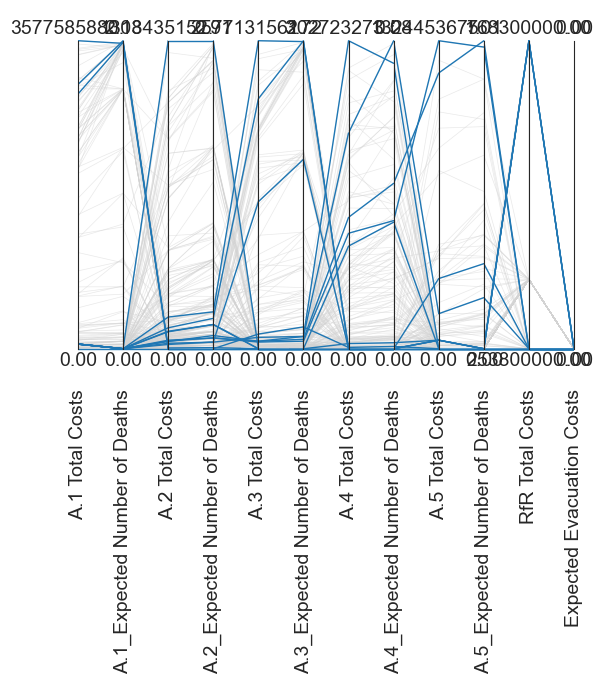

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench.analysis import parcoords

# conditional on y
all_data = pd.DataFrame({k:v for k,v in outcomes.items()})

# let's get the unique indices for the minima and maxima across 
# all objectives
indices = pd.concat([all_data.idxmax(), all_data.idxmin()]).unique()

limits = parcoords.get_limits(all_data)
axes = parcoords.ParallelAxes(limits)

# we set the linewidth lower, and make the lines slightly transpartant using alpha
# this often helps reveal patterns in the results.
axes.plot(all_data, color='lightgrey', lw=0.5, alpha=0.5)
axes.plot(all_data.iloc[indices, :], color=sns.color_palette()[0], lw=1)
#axes.invert_axis('max_P')

fig = plt.gcf()

plt.show()

In [7]:
print(all_data.idxmax())
print(all_data.idxmin())

A.1 Total Costs                  184
A.1_Expected Number of Deaths    124
A.2 Total Costs                   38
A.2_Expected Number of Deaths     38
A.3 Total Costs                   48
A.3_Expected Number of Deaths     11
A.4 Total Costs                   36
A.4_Expected Number of Deaths     86
A.5 Total Costs                   93
A.5_Expected Number of Deaths     24
RfR Total Costs                  100
Expected Evacuation Costs          0
dtype: int64
A.1 Total Costs                  103
A.1_Expected Number of Deaths      0
A.2 Total Costs                   81
A.2_Expected Number of Deaths     81
A.3 Total Costs                    0
A.3_Expected Number of Deaths      0
A.4 Total Costs                    0
A.4_Expected Number of Deaths      0
A.5 Total Costs                    1
A.5_Expected Number of Deaths      1
RfR Total Costs                    0
Expected Evacuation Costs          0
dtype: int64


In [8]:
# also all we need are the uncertainty columns
selected = experiments.loc[[184,124], ['A.1_pfail', 'A.1_Bmax', 'A.1_Brate', 'A.2_pfail', 'A.2_Bmax', 'A.2_Brate','A.3_pfail', 'A.3_Bmax', 'A.3_Brate','A.4_pfail', 'A.4_Bmax', 'A.4_Brate','A.5_pfail', 'A.5_Bmax', 'A.5_Brate', 'discount rate 0','discount rate 1','discount rate 2','A.0_ID flood wave shape']]
selected

,A.1_pfail,A.1_Bmax,A.1_Brate,A.2_pfail,A.2_Bmax,A.2_Brate,A.3_pfail,A.3_Bmax,A.3_Brate,A.4_pfail,A.4_Bmax,A.4_Brate,A.5_pfail,A.5_Bmax,A.5_Brate,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape
184,0.003546,232.059652,10.0,0.244002,69.180552,10.0,0.811968,66.730665,1.0,0.246000,196.956421,1.5,0.769975,125.107513,1.0,3.5,1.5,1.5,114
124,0.297897,145.080727,10.0,0.692490,261.980122,1.5,0.839245,181.845832,1.5,0.232359,188.950014,1.5,0.023297,282.880103,1.5,3.5,3.5,1.5,45


In [9]:
from ema_workbench import Scenario

scenarios = [Scenario(f"{index}", **row) for index, row in selected.iterrows()]

In [ ]:
# from ema_workbench import (Model, RealParameter, ScalarOutcome, CategoricalParameter, IntegerParameter)



# #specify uncertainties
# dike_model.uncertainties = [
# RealParameter('A.1_Bmax', 30, 350),
# RealParameter('A.1_pfail', 0, 1),
# CategoricalParameter('A.1_Brate', [0, 1, 2]),
# RealParameter('A.2_Bmax', 30, 350),
# RealParameter('A.2_pfail', 0, 1),
# CategoricalParameter('A.2_Brate', [0, 1, 2]),
# RealParameter('A.3_Bmax', 30, 350),
# RealParameter('A.3_pfail', 0, 1),
# CategoricalParameter('A.3_Brate', [0, 1, 2]),
# RealParameter('A.4_Bmax', 30, 350),
# RealParameter('A.4_pfail', 0, 1),
# CategoricalParameter('A.4_Brate', [0, 1, 2]),
# RealParameter('A.5_Bmax', 30, 350),
# RealParameter('A.5_pfail', 0, 1),
# CategoricalParameter('A.5_Brate', [0, 1, 2])
# ]

# # set levers
# dike_model.levers = [
# IntegerParameter('0_RfR 0', 0, 1),
# IntegerParameter('0_RfR 1', 0, 1),
# IntegerParameter('0_RfR 2', 0, 1),
# IntegerParameter('1_RfR 0', 0, 1),
# IntegerParameter('1_RfR 1', 0, 1),
# IntegerParameter('1_RfR 2', 0, 1),
# IntegerParameter('2_RfR 0', 0, 1),
# IntegerParameter('2_RfR 1', 0, 1),
# IntegerParameter('2_RfR 2', 0, 1),
# IntegerParameter('3_RfR 0', 0, 1),
# IntegerParameter('3_RfR 1', 0, 1),
# IntegerParameter('3_RfR 2', 0, 1),
# IntegerParameter('4_RfR 0', 0, 1),
# IntegerParameter('4_RfR 1', 0, 1),
# IntegerParameter('4_RfR 2', 0, 1),
# IntegerParameter('EWS_DaysToThreat', 0, 4),
# IntegerParameter('A.1_DikeIncrease 0', 0, 10),
# IntegerParameter('A.1_DikeIncrease 1', 0, 10),
# IntegerParameter('A.1_DikeIncrease 2', 0, 10),
# IntegerParameter('A.2_DikeIncrease 0', 0, 10),
# IntegerParameter('A.2_DikeIncrease 1', 0, 10),
# IntegerParameter('A.2_DikeIncrease 2', 0, 10),
# IntegerParameter('A.3_DikeIncrease 0', 0, 10),
# IntegerParameter('A.3_DikeIncrease 1', 0, 10),
# IntegerParameter('A.3_DikeIncrease 2', 0, 10),
# IntegerParameter('A.4_DikeIncrease 0', 0, 10),
# IntegerParameter('A.4_DikeIncrease 1', 0, 10),
# IntegerParameter('A.4_DikeIncrease 2', 0, 10),
# IntegerParameter('A.5_DikeIncrease 0', 0, 10),
# IntegerParameter('A.5_DikeIncrease 1', 0, 10),
# IntegerParameter('A.5_DikeIncrease 2', 0, 10),
# ]

# #specify outcomes
# # note how we need to explicitely indicate the direction
# dike_model.outcomes = [
# ScalarOutcome('A.1 Total Costs',kind=ScalarOutcome.MINIMIZE),
# ScalarOutcome('A.1_Expected Number of Deaths', kind=ScalarOutcome.MINIMIZE),
# ScalarOutcome('A.2 Total Costs', kind=ScalarOutcome.MINIMIZE),
# ScalarOutcome('A.2_Expected Number of Deaths', kind=ScalarOutcome.MINIMIZE),
# ScalarOutcome('A.3 Total Costs', kind=ScalarOutcome.MINIMIZE),
# ScalarOutcome('A.3_Expected Number of Deaths', kind=ScalarOutcome.MINIMIZE),
# ScalarOutcome('A.4 Total Costs', kind=ScalarOutcome.MINIMIZE),
# ScalarOutcome('A.4_Expected Number of Deaths', kind=ScalarOutcome.MINIMIZE),
# ScalarOutcome('A.5 Total Costs', kind=ScalarOutcome.MINIMIZE),
# ScalarOutcome('A.5_Expected Number of Deaths',kind=ScalarOutcome.MINIMIZE),
# ScalarOutcome('RfR Total Costs', kind=ScalarOutcome.MINIMIZE),
# ScalarOutcome('Expected Evacuation Costs', kind=ScalarOutcome.MINIMIZE),
# ]

In [26]:
for unc in uncertainties:
    print(repr(unc))

# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in levers:
    print(repr(policy))

# enlisting outcomes
for outcome in dike_model.outcomes:
    print(outcome)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [10]:
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench.em_framework.optimization import (ArchiveLogger,
                                                     EpsilonProgress,
                                                     to_problem, epsilon_nondominated)

ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench.em_framework import optimization

def transform_variables_fixed(problem, variables):
    converted_vars = []
    for type, var in zip(problem.types, variables):
        if isinstance(var, (list, tuple)):
            var = type.decode(var)
            try:
                var = var[0]
            except TypeError:
                pass
        converted_vars.append(var)
    return converted_vars
from ema_workbench.em_framework import optimization
from ema_workbench.util.ema_exceptions import EMAError
from platypus import Solution

def rebuild_platypus_population_fixed(archive, problem):
    solutions = []

    for _, row in archive.iterrows():
        try:
            decision_variables = [row[attr] for attr in problem.parameter_names]
        except KeyError:
            missing_parameters = [attr for attr in problem.parameter_names if attr not in row]
            raise EMAError(f"Parameter names {missing_parameters} not found in archive")

        try:
            objectives = [row[attr] for attr in problem.outcome_names]
        except KeyError:
            missing_outcomes = [attr for attr in problem.outcome_names if attr not in row]
            raise EMAError(f"Outcome names {missing_outcomes} not found in archive")

        solution = Solution(problem)

        # ✅ the clean, warning-free way:
        solution.variables[:] = decision_variables
        solution.objectives[:] = objectives

        solutions.append(solution)

    return solutions

# Monkeypatch the function
optimization.rebuild_platypus_population = rebuild_platypus_population_fixed
optimization.transform_variables = transform_variables_fixed
def optimize(scenario, nfe, model, epsilons):
    results = []
    convergences = []
    problem = to_problem(model, searchover="levers")

    with MultiprocessingEvaluator(model) as evaluator:
        for i in range(5):
            convergence_metrics = [
                ArchiveLogger(
                    "./archives",
                    [l.name for l in model.levers],
                    [o.name for o in model.outcomes],
                    base_filename=f"assignment_final_{scenario.name}_seed_{i}.tar.gz",
                ),
                EpsilonProgress(),
            ]

            result, convergence = evaluator.optimize(nfe=nfe, searchover='levers',
                                         convergence=convergence_metrics,
                                         epsilons=epsilons,
                                         reference=scenario)

            results.append(result)
            convergences.append(convergence)
    
    # merge the results using a non-dominated sort  
    reference_set = epsilon_nondominated(results, epsilons, problem)
    
    return reference_set, convergences


results = []
for scenario in scenarios:
    epsilons = [0.1,]*len(dike_model.outcomes)
    
    # note that 100000 nfe is again rather low to ensure proper convergence
    results.append(optimize(scenario, 1e2, dike_model, epsilons))

[MainProcess/INFO] pool started with 12 workers
100%|████████████████████████████████████████| 100/100 [00:10<00:00,  9.36it/s]
[MainProcess/INFO] optimization completed, found 79 solutions
100%|████████████████████████████████████████| 100/100 [00:10<00:00,  9.67it/s]
[MainProcess/INFO] optimization completed, found 72 solutions
100%|████████████████████████████████████████| 100/100 [00:10<00:00,  9.73it/s]
[MainProcess/INFO] optimization completed, found 67 solutions
100%|████████████████████████████████████████| 100/100 [00:10<00:00,  9.30it/s]
[MainProcess/INFO] optimization completed, found 85 solutions
100%|████████████████████████████████████████| 100/100 [00:10<00:00,  9.57it/s]
[MainProcess/INFO] optimization completed, found 80 solutions
[MainProcess/INFO] terminating pool
[MainProcess/INFO] pool started with 12 workers
100%|████████████████████████████████████████| 100/100 [00:12<00:00,  7.95it/s]
[MainProcess/INFO] optimization completed, found 70 solutions
100%|███████████

In [11]:
from platypus import Hypervolume
from ema_workbench.em_framework.optimization import rebuild_platypus_population


def calculate_convergence_metrics(problem, archives_file):
    #hv = Hypervolume(minimum=[0, 0, 0, 0], maximum=[12, 3, 1, 1])
    hv = Hypervolume(
    minimum=[0] * problem.nobjs,
    maximum=[2000] * problem.nobjs)
    archives = ArchiveLogger.load_archives(archives_file)
    metrics = []
    for nfe, archive in archives.items():
        population = rebuild_platypus_population(archive, problem)
        metrics.append(dict(hypervolume=hv.calculate(population), nfe=nfe))
        
    metrics = pd.DataFrame.from_dict(metrics)
    metrics.sort_values(by="nfe", inplace=True, ignore_index=True)    
    return metrics


problem = to_problem(dike_model, searchover="levers")
convergence_calculations = []
for (refset, eps_progress), scenario in zip(results, scenarios):
    for seed, seed_eps in zip(range(5), eps_progress):
        archive_file = f"./archives/assignment_final_{scenario.name}_seed_{seed}.tar.gz"
        metrics = calculate_convergence_metrics(problem, archive_file)
        metrics["seed"] = seed
        metrics["scenario"] = scenario.name
        metrics["epsilon_progress"] = seed_eps.epsilon_progress   
        
        convergence_calculations.append(metrics)
convergence = pd.concat(convergence_calculations, ignore_index=True)

<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:20: SyntaxWarning: invalid escape sequence '\e'
C:\Users\jhsti\AppData\Local\Temp\ipykernel_118972\4255884186.py:20: SyntaxWarning: invalid escape sequence '\e'
  ax2.set_ylabel('$\epsilon$ progress')


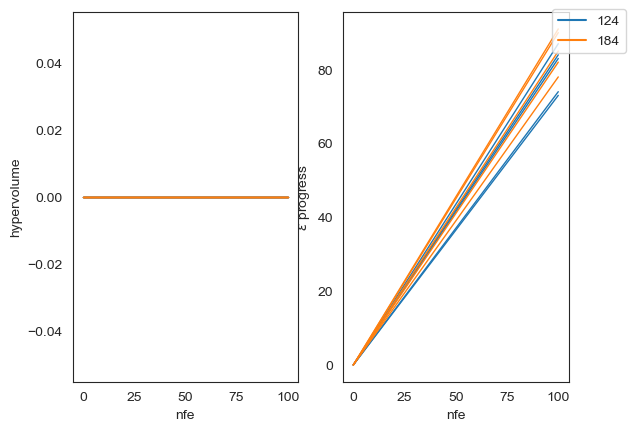

In [12]:
import matplotlib as mpl
import seaborn as sns


fig, (ax1, ax2) = plt.subplots(ncols=2)

colors = sns.color_palette()

legend_items = []
for (scenario_name, scores), color in zip(convergence.groupby("scenario"), colors):
    # we use this for a custom legend
    legend_items.append((mpl.lines.Line2D([0, 0], [1, 1], c=color), scenario_name))
    for seed, score in scores.groupby("seed"):
        ax1.plot(score.nfe, score.hypervolume, c=color, lw=1)
        ax2.plot(score.nfe, score.epsilon_progress, c=color, lw=1)


ax1.set_ylabel('hypervolume')
ax1.set_xlabel('nfe')
ax2.set_ylabel('$\epsilon$ progress')
ax2.set_xlabel('nfe')

# create our custom legend
artists, labels = zip(*legend_items)
fig.legend(artists, labels, bbox_to_anchor=(1,0.9))

plt.show()

In [13]:
for i in range(len(results)):
    print(results[i][0].columns)
    print(type(results[i][0]))

Index(['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2',
       '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2',
       '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs',
       'A.2_Expected Number of Deaths', 'A.3 Total Costs',
       'A.3_Expected Number of Deaths', 'A.4 Total Costs',
       'A.4_Expected Number of Deaths', 'A.5 Total Costs',
       'A.5_Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['0_RfR 0', 

In [14]:
from ema_workbench import Policy

policies = []
for i, (result, _) in enumerate(results):
    result = result.iloc[:, 0:31]
    for j, row in result.iterrows():
        policy = Policy(f'scenario {i} option {j}', **row.to_dict())
        policies.append(policy)

In [46]:
print(policies)

[Policy({'A.1 Total Costs': 135674464.19102705}), Policy({'A.1 Total Costs': 177176211.2650955}), Policy({'A.1 Total Costs': 88429031.37443781}), Policy({'A.1 Total Costs': 196459409.4413345}), Policy({'A.1 Total Costs': 185530004.19288784}), Policy({'A.1 Total Costs': 206812690.61373156}), Policy({'A.1 Total Costs': 136578326.41305238}), Policy({'A.1 Total Costs': 98043050.03325048}), Policy({'A.1 Total Costs': 101988088.03595176}), Policy({'A.1 Total Costs': 187884915.525239}), Policy({'A.1 Total Costs': 262167392.1877288}), Policy({'A.1 Total Costs': 223541865.71237952}), Policy({'A.1 Total Costs': 147239991.00478667}), Policy({'A.1 Total Costs': 284017561.51690406}), Policy({'A.1 Total Costs': 90462322.17815001}), Policy({'A.1 Total Costs': 294687522.5069957}), Policy({'A.1 Total Costs': 148997519.22073448}), Policy({'A.1 Total Costs': 164592029.08386078}), Policy({'A.1 Total Costs': 131919288.31926736}), Policy({'A.1 Total Costs': 200635768.54993573}), Policy({'A.1 Total Costs': 1

In [15]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    reeevaluation_results = evaluator.perform_experiments(2, policies=policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 2 scenarios * 529 policies * 1 model(s) = 1058 experiments
100%|██████████████████████████████████████| 1058/1058 [02:13<00:00,  7.90it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [16]:
experiments, outcomes = reeevaluation_results

# setup a dataframe for the outcomes
# we add scenario and policy as additional columns
# we need scenario because regret is calculated on a scenario by scenario basis
# we add policy because we need to get the maximum regret for each policy.
outcomes = pd.DataFrame(outcomes)
outcomes['scenario'] = experiments.scenario
outcomes['policy'] = experiments.policy

def calculate_regret(x):
    best = x.min(numeric_only=True)
    regret = x.loc[:, best.index] - best
    regret['policy'] = x.policy
    return regret


# we want to calculate regret on a scenario by scenario basis
regret = outcomes.groupby('scenario', group_keys=False).apply(calculate_regret)

# as last step, we calculate the maximum regret for each policy
max_regret = regret.groupby('policy').max()

C:\Users\jhsti\AppData\Local\Temp\ipykernel_118972\2495122014.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regret = outcomes.groupby('scenario', group_keys=False).apply(calculate_regret)
C:\Users\jhsti\AppData\Local\Temp\ipykernel_118972\2495122014.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regret = outcomes.groupby('scenario', group_keys=False).apply(calculate_regret)
C:\Users\jhsti\AppData\Local\Temp\ipykernel_118972\2495122014.py:22: FutureWarning: The default of observed=False is deprec

c:\Users\jhsti\anaconda3\Lib\site-packages\ema_workbench\analysis\parcoords.py:220: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


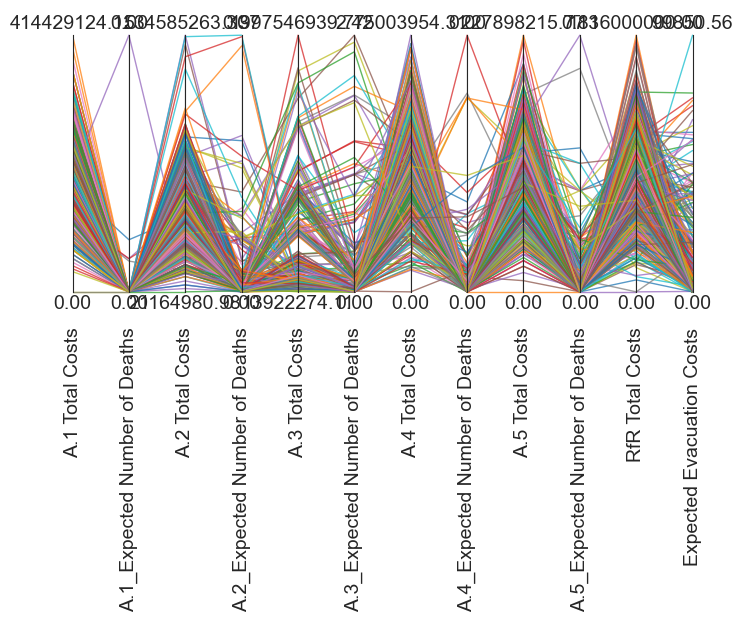

In [17]:
# I reorder the columns
#max_regret = max_regret[['max_P', 'reliability','utility', 'inertia']]

limits = parcoords.get_limits(max_regret)
paraxes = parcoords.ParallelAxes(max_regret)
paraxes.plot(max_regret, lw=1, alpha=0.75)

# let's resize the figure a bit
fig = plt.gcf()
fig.set_size_inches(8, 4)

plt.show()